In [1]:
import requests
import json
import pandas as pd

data_json = pd.read_json("result_all.json")

In [2]:
data_json

,company_reviews
0,"{'name': 'Галина Борисова', 'icon_href': None,..."
1,"{'name': 'Алексей Р.', 'icon_href': None, 'dat..."
2,"{'name': 'Любовь Кондрашова', 'icon_href': Non..."
3,"{'name': 'Марина Балынина', 'icon_href': 'http..."
4,"{'name': 'Галина Головинская', 'icon_href': 'h..."
...,...
171,"{'name': 'Александр Панов', 'icon_href': None,..."
172,"{'name': 'Наталья Н.', 'icon_href': 'https://a..."
173,"{'name': 'Михаил', 'icon_href': 'https://avata..."
174,"{'name': 'Igoryan Psyhdotla', 'icon_href': 'ht..."


In [3]:
data = json.load(open('result_all.json'))

data = pd.DataFrame(data["company_reviews"])

In [4]:
data["text"]

0      Услугами банка пользуюсь несколько лет,без нар...
1      Очень хороший банк, сотрудники быстро обслужив...
2      Удобно расположенное отделение. Посещала неско...
3      Консультантов в зале я вообще не увидела, опер...
4      Удобное расположение этого офиса, наличие банк...
                             ...                        
171                                 хорошее обслуживание
172                                      Как и все банки
173    ВТБ по уровню клиентского сервиса ужасная орга...
174    Ужасное отношение к клиентам,некомпитентность ...
175                                       Очередь вечная
Name: text, Length: 176, dtype: object

In [5]:
from gensim.models import KeyedVectors, Word2Vec, Phrases
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


tfidf_matrix = tfidf.fit_transform(data["text"])

In [9]:
# Получение списка ключевых слов
tfidf_keywords = tfidf.get_feature_names_out()

print("TF-IDF ключевые слова:", tfidf_keywords)

TF-IDF ключевые слова: ['07' '10' '11' ... 'явно' 'якобы' 'яму']


In [14]:
from summa import keywords

text_rank_keywords = keywords.keywords(data['text'][0])

print("TextRank ключевые слова:", text_rank_keywords)

TextRank ключевые слова: и
в
с
к
за
что
особенно приятно
далеко не у
банка пользуюсь несколько


In [163]:
data["text"]

0      Услугами банка пользуюсь несколько лет,без нар...
1      Очень хороший банк, сотрудники быстро обслужив...
2      Удобно расположенное отделение. Посещала неско...
3      Консультантов в зале я вообще не увидела, опер...
4      Удобное расположение этого офиса, наличие банк...
                             ...                        
171                                 хорошее обслуживание
172                                      Как и все банки
173    ВТБ по уровню клиентского сервиса ужасная орга...
174    Ужасное отношение к клиентам,некомпитентность ...
175                                       Очередь вечная
Name: text, Length: 176, dtype: object

In [164]:
corpus_preprocessed

['удобный_ADJ расположенное_ADJ отделение_NOUN раз_NOUN вежливый_ADJ обслуживание_NOUN вопрос_NOUN моеи_PROPN картои_PROPN внимательный_ADJ сотрудник_NOUN профессионал_NOUN',
 'хорошии_ADJ банк_NOUN сотрудник_NOUN благодарность_NOUN ратниковои_PROPN валерия_PROPN викторович_PROPN понятный_ADJ предложение_NOUN продукт_NOUN банк_NOUN отделение_NOUN',
 'огромный_ADJ очередь_NOUN талончик_NOUN очередь_NOUN специалист_NOUN проблема_NOUN последнии_NOUN раз_NOUN рука_NOUN причина_NOUN',
 'банк_NOUN сотрудник_NOUN больший_ADJ молодец_NOUN обслуживание_NOUN быстрый_ADJ высокий_ADJ уровень_NOUN',
 'консультант_NOUN зал_NOUN оператор_NOUN стоикои_NOUN приятный_ADJ девушка_NOUN представитель_NOUN банк_NOUN представление_NOUN услуга_NOUN банк_NOUN вклад_NOUN сеифа_NOUN банк_NOUN вопрос_NOUN понятный_ADJ человек_NOUN информациеи_NOUN уважаемый_ADJ администрация_NOUN сотрудник_NOUN продукция_NOUN банк_NOUN сотрудник_NOUN банк_NOUN клиент_NOUN сотрудник_NOUN лишний_ADJ вопрос_NOUN',
 'персонал_NOUN вн

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


tfidf_matrix = tfidf.fit_transform(corpus_preprocessed)

In [166]:
tfidf_matrix

<176x593 sparse matrix of type '<class 'numpy.float64'>'
	with 1347 stored elements in Compressed Sparse Row format>

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_tsne = KMeans(n_clusters=15, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(tfidf_matrix)

In [168]:
labels_tsne

array([ 2,  8,  6,  7,  8,  9, 14,  6,  3,  1,  6,  9, 11,  7,  8,  9,  8,
       10,  2, 13, 13, 12,  6, 14, 13, 14,  7,  0, 13,  7,  8,  8,  0,  9,
        5, 10,  9, 10,  7,  3, 11, 10,  9,  7,  2,  3,  8,  9, 11,  1,  2,
        1,  0,  1,  1,  5,  8,  1,  2,  6,  9, 12, 14,  6,  7,  8, 14,  0,
        4,  0,  9,  8,  4,  3,  7,  0,  5, 14,  0, 10,  2, 10,  3, 11,  8,
        0,  7,  8,  1,  2, 12,  6, 13,  3,  8,  7,  8,  1, 13, 12,  8,  8,
        9, 12, 10,  0, 12,  8,  1,  9, 12,  0,  0, 14, 10,  0,  8, 14,  6,
        0, 13,  8, 12,  0,  0,  1,  8,  3,  8,  7,  7,  0, 10, 13,  2,  9,
        8,  6,  7,  0,  1,  8,  7,  3, 11, 10, 10, 13, 13,  8, 10,  8,  8,
       12, 14,  0,  8,  8,  7, 12,  4,  0,  6,  0,  9,  0,  0,  0,  9,  7,
        4, 10,  8,  5,  0, 13], dtype=int32)

In [169]:
# Вычисление Silhouette score для компонент t-SNE
silhouette_avg_tsne = silhouette_score(tfidf_matrix, labels_tsne)
print("Silhouette score: ", silhouette_avg_tsne)

# Вычисление Davies-Bouldin index для компонент t-SNE
db_index_tsne = davies_bouldin_score(tfidf_matrix.toarray(), labels_tsne)
print("Davies-Bouldin index: ", db_index_tsne)

Silhouette score:  -0.0030696040104354577
Davies-Bouldin index:  3.4866288760577095


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_39239/3681416467.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=50)


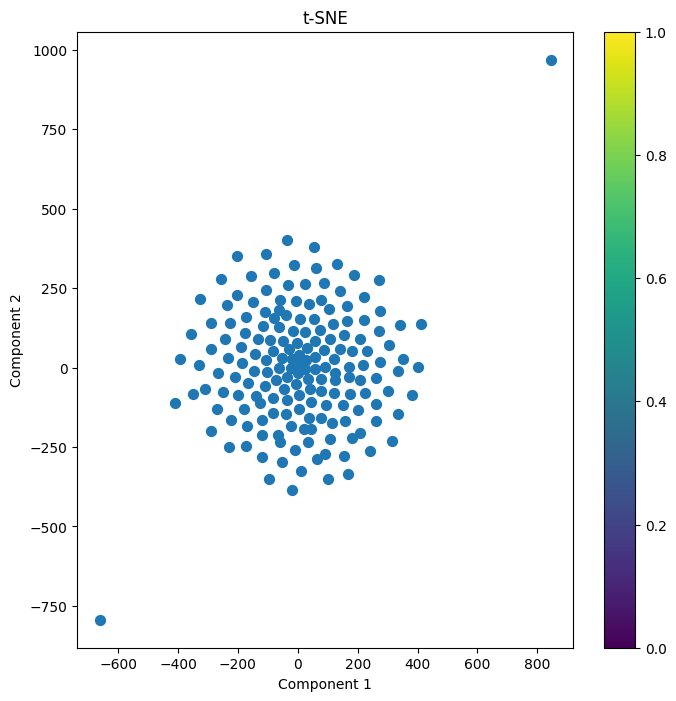

In [170]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus.to_numpy()[:1000])

# # Стандартизация данных
# scaler = StandardScaler(with_mean=False)
# X_scaled = scaler.fit_transform(X)
# X_scaled = X

# SVD
# svd = TruncatedSVD(n_components=2, random_state=42)
# X_svd = svd.fit_transform(X_scaled, y_tags[:10000])

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_matrix)

# # Визуализация данных с помощью TruncatedSVD
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_tags[:10000])
# plt.title('TruncatedSVD')
# plt.show()

# # Визуализация данных с помощью t-SNE
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tags[:10000])
# plt.title('t-SNE')
# plt.show()

# Визуализация данных с помощью TruncatedSVD
# plt.figure(figsize=(8, 6))
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_tags[:10000], cmap='viridis', s=50)
# plt.colorbar()
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('TruncatedSVD')
# plt.show()

# Визуализация данных с помощью t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=50)
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE')
plt.show()

In [182]:
tsne.get_feature_names_out([1])

AttributeError: 'TSNE' object has no attribute 'get_feature_names_out'

In [ ]:
tfidf_matrix

In [181]:
X_tsne

array([[-6.24754295e+01, -1.98404300e+00],
       [-1.06939445e+02,  2.34855652e+01],
       [ 2.60172058e+02, -3.33288536e+01],
       [-8.15473328e+01, -9.61254272e+01],
       [ 7.82659225e+01, -1.58238174e+02],
       [-1.20135605e+02, -2.80000793e+02],
       [ 2.39243908e+01,  1.10388718e+02],
       [-1.99073257e+01, -3.83978882e+02],
       [ 1.55648468e+02,  1.01948746e+02],
       [-2.65766571e+02, -1.69642086e+01],
       [-2.88451630e+02,  1.39659515e+02],
       [ 1.73720871e+02, -8.16378021e+01],
       [ 9.95109863e+01, -3.50979370e+02],
       [ 2.24166092e+02, -8.04247055e+01],
       [-7.99591599e+01,  2.98383087e+02],
       [ 1.86325012e+02,  2.91110504e+02],
       [-2.42256546e+01, -1.83525528e+02],
       [ 9.15296326e+01,  3.20820856e+00],
       [-2.31532318e+02, -2.49171143e+02],
       [-1.78044373e+02,  1.07470001e+02],
       [ 2.18936768e+02,  9.64047527e+00],
       [-2.90556610e+02, -1.99017792e+02],
       [-4.11049469e+02, -1.10065277e+02],
       [-1.

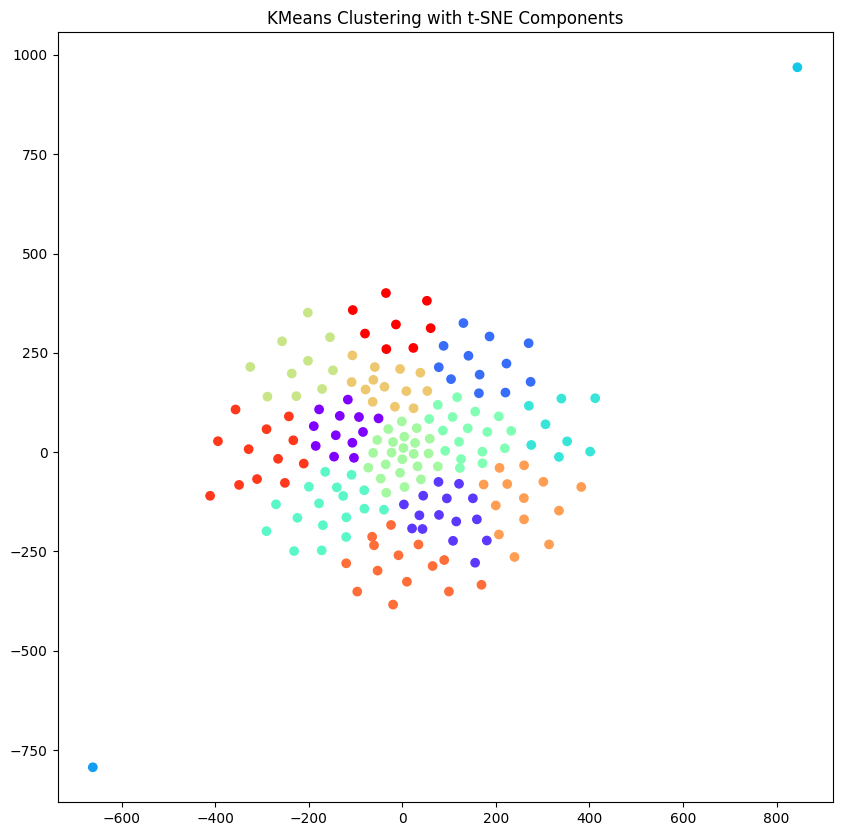

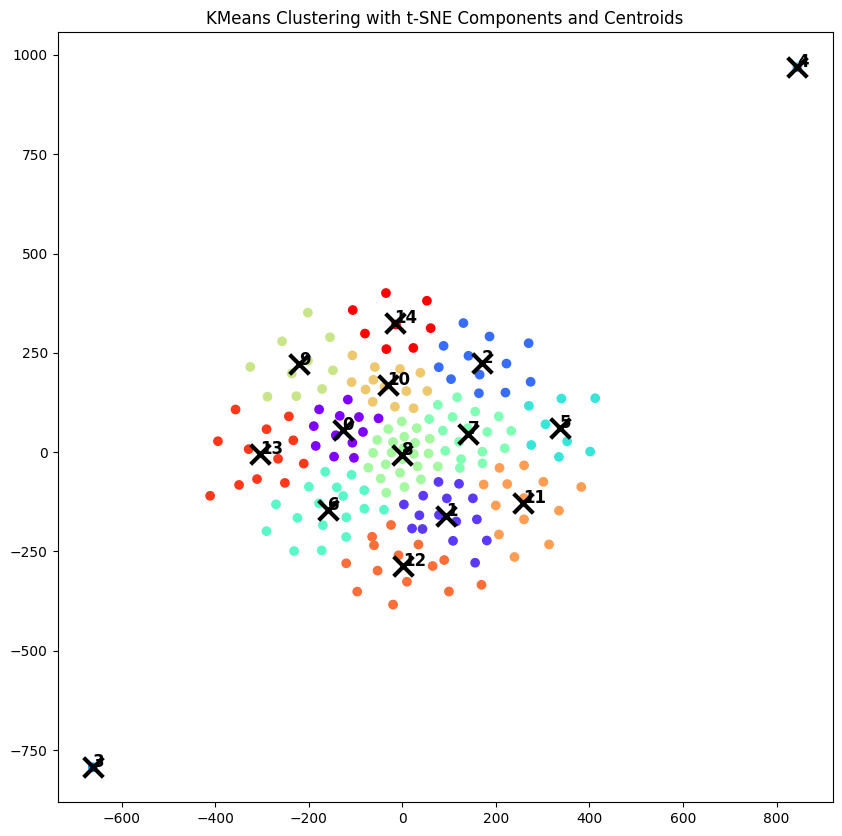

Silhouette score для компонент t-SNE: 0.2855167
Davies-Bouldin index для компонент t-SNE: 0.7498883652021315


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Кластеризация данных с помощью KMeans на основе компонент t-SNE
kmeans_tsne = KMeans(n_clusters=15, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)

# Визуализация кластеризации
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='rainbow')
plt.title('KMeans Clustering with t-SNE Components')
plt.show()

# Визуализация центроидов кластеров
plt.figure(figsize=(10, 10))
centroids_tsne = kmeans_tsne.cluster_centers_
centroid_labels_tsne = np.unique(labels_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='rainbow')
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], marker='x', s=200, linewidths=3, color='black')
for i, label in enumerate(centroid_labels_tsne):
    plt.annotate(label, (centroids_tsne[i, 0], centroids_tsne[i, 1]), fontsize=12, fontweight='bold')
plt.title('KMeans Clustering with t-SNE Components and Centroids')
plt.show()

# Вычисление Silhouette score для компонент t-SNE
silhouette_avg_tsne = silhouette_score(X_tsne, labels_tsne)
print("Silhouette score для компонент t-SNE:", silhouette_avg_tsne)

# Вычисление Davies-Bouldin index для компонент t-SNE
db_index_tsne = davies_bouldin_score(X_tsne, labels_tsne)
print("Davies-Bouldin index для компонент t-SNE:", db_index_tsne)

In [180]:
# Создание словаря для кластеров
cluster_words = {}
for cluster_label in np.unique(labels_tsne):
    cluster_words[cluster_label] = []

# Заполнение словаря словами
for i, label in enumerate(labels_tsne):
    cluster_words[label].append(tfidf_matrix[i])  # Предполагается, что у вас есть список слов 'words' в том же порядке, как и X_tsne

# Вывод слов для каждого кластера
for cluster_label, words_list in cluster_words.items():
    print(f"Кластер {cluster_label}: {', '.join(words_list)}")

TypeError: sequence item 0: expected str instance, csr_matrix found

In [179]:
centroids_tsne

array([[-127.49807  ,   56.28843  ],
       [  92.58303  , -160.11858  ],
       [ 170.30688  ,  224.19751  ],
       [-661.78015  , -793.5895   ],
       [ 844.4098   ,  968.8836   ],
       [ 336.53503  ,   61.400753 ],
       [-160.00403  , -144.75291  ],
       [ 140.0784   ,   46.646347 ],
       [  -1.2984028,   -8.359997 ],
       [-221.28815  ,  220.6604   ],
       [ -31.809929 ,  169.63156  ],
       [ 258.72775  , -128.36392  ],
       [   1.380343 , -286.25793  ],
       [-303.72067  ,   -5.397344 ],
       [ -16.61622  ,  324.03757  ]], dtype=float32)

In [178]:
centroid_labels_tsne

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [173]:
from sklearn.decomposition import LatentDirichletAllocation

# Определите доминирующие ключевые слова для каждого кластера
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(tfidf_matrix)
len(lda.components_[1])

593

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_count = CountVectorizer()
X_count_vec = vectorizer_count.fit_transform([i for i in data["text"]])

In [175]:
X_count_vec

<176x1569 sparse matrix of type '<class 'numpy.int64'>'
	with 3161 stored elements in Compressed Sparse Row format>

In [176]:
feature_names = vectorizer_count.get_feature_names()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-6:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # print(123)
    print(f"Cluster {i}: {', '.join(top_words)}")

Cluster 0: банковских, 40, закрылся, друг, живой
Cluster 1: друзьям, знали, карте, двигается, всё
Cluster 2: 40, большинство, консультацию, всего, 60
Cluster 3: доступен, 60, корректное, благодарна, ждала
Cluster 4: закрытия, банкоматов, задавались, месте, 11
Cluster 5: больше, вот, было, баранова, банкомат
Cluster 6: задавались, доступен, 60, вообщем, магазин
Cluster 7: дело, 40, каждым, бфло, которым
Cluster 8: дождалась, догадываться, ждите, видимо, какая
Cluster 9: 40, вежливое, зависит, каждым, консультацию
Cluster 10: магазин, доступен, банках, ждите, 60
Cluster 11: денег, задавались, желание, магазин, достаточно
Cluster 12: 40, другом, более, громко, консультацию
Cluster 13: ждите, вип, вроде, зверополис, дело
Cluster 14: жизнь, копилка, доступен, коп, евро
Cluster 15: атмосфера, без, залипает, да, изнеможении
Cluster 16: банком, закрылся, красная, грустно, банках
Cluster 17: даже, кучкуются, 40, лечить, дальше
Cluster 18: больше, документы, 40, за, вот
Cluster 19: кредитными, к

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Использовать word2vec

In [6]:
w2v_model = KeyedVectors.load_word2vec_format('data/ruscorpora_upos_cbow_300_20_2019.bin', binary=True)

len(w2v_model.key_to_index)

189193

In [11]:
corpus = pd.Series([simple_preprocess(text, deacc=True) for text in data['text'].apply(str)])

corpus

0      [услугами, банка, пользуюсь, несколько, лет, б...
1      [очень, хорошии, банк, сотрудники, быстро, обс...
2      [удобно, расположенное, отделение, посещала, н...
3      [консультантов, зале, вообще, не, увидела, опе...
4      [удобное, расположение, этого, офиса, наличие,...
                             ...                        
171                              [хорошее, обслуживание]
172                                    [как, все, банки]
173    [втб, по, уровню, клиентского, сервиса, ужасна...
174          [ужасное, отношение, клиентам, сотрудников]
175                                    [очередь, вечная]
Length: 176, dtype: object

In [12]:
import string
from spacy.lang.ru.stop_words import STOP_WORDS as RU_STOP_WORDS
import spacy
from multiprocessing import Pool
from multiprocessing.pool import ThreadPool
from tqdm import tqdm

nlp = spacy.load("ru_core_news_lg")

SPEECH_PARTS = ['ADJ', 'ADV']

def preprocess_text(text):
    # text = " ".join(text).lower()
    text = ' '.join([' ' if not char.isalpha() and char not in string.punctuation else char for char in text])
    doc = nlp(text)
    lemmatized_tokens = []
    # word_vectors = []
    for token in doc:
        if token.is_alpha and token.text not in RU_STOP_WORDS:
            lemma = token.lemma_
            pos = token.pos_
            # Если токен - известное модели слово
            if pos in SPEECH_PARTS:
                lemmatized_tokens.append(f"{lemma}_{pos}")
    
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

def preprocess_corpus(corpus):
    with Pool(processes=8) as pool:
        results = []
        for result in tqdm(pool.imap_unordered(preprocess_text, corpus), total=len(corpus)):
            results.append(result)
    return results

corpus_preprocessed = preprocess_corpus(corpus)

100%|██████████| 176/176 [00:01<00:00, 160.18it/s]


In [13]:
corpus_preprocessed

['огромный_ADJ',
 'хорошии_ADJ быстро_ADV подробно_ADV понятный_ADJ впредь_ADV',
 'удобный_ADJ расположенное_ADJ вежливый_ADJ внимательный_ADJ',
 'хороший_ADJ отлично_ADV',
 'внимательный_ADJ совершенно_ADV знакомои_ADV быстрый_ADJ',
 'больший_ADJ быстрый_ADJ высокий_ADJ',
 'приятный_ADJ отзывчивый_ADJ внимательный_ADJ понимающие_ADJ вежливый_ADJ компетентный_ADJ достаточно_ADV тактичный_ADJ подробно_ADV признательный_ADJ благодарный_ADJ приятный_ADJ положительный_ADJ человеческий_ADJ',
 '',
 'ужасный_ADJ видимо_ADV желательно_ADV',
 'ужасный_ADJ предыдущий_ADJ громко_ADV дословно_ADV столько_ADV общий_ADJ зарплатный_ADJ новый_ADJ',
 'быстро_ADV качественно_ADV лишний_ADJ доступный_ADJ',
 'удобный_ADJ круглосуточный_ADJ неоднократно_ADV разный_ADJ приятный_ADV главный_ADJ',
 'удобный_ADJ вежливо_ADV',
 'прекрасный_ADV',
 'общий_ADJ неудобно_ADV сюда_ADV виноватый_ADJ вежливый_ADJ',
 'приятный_ADJ слабовато_ADV расплывчатый_ADV понятный_ADJ новыя_ADV уважаемый_ADJ четко_ADV быстро_ADV ч

In [14]:
import torch

class Vocab:
    def __init__(self, corpus, w2v_model):
        self.idx_to_token = {}
        self.token_to_idx = {}
        self.vocab_len = 0
        self.max_seq_len = 0
        self.word_vectors = None
        self.w2v_model = w2v_model

        for sentence in corpus:
            self.max_seq_len = max(self.max_seq_len, len(sentence))

        # Добавляем токен для неизвестных слов
        self.idx_to_token = {0: '<pad>', 1: '<unk>'}
        self.token_to_idx = {'<pad>': 0, '<unk>': 1}
        self.vocab_len += 1

        # # Строим словарь
        # for sentence in tqdm(corpus):
        #     for word in sentence.split():
        #         if word not in self.token_to_idx:
        #             if word in list(self.w2v_model.key_to_index):
        #                 self.idx_to_token[self.vocab_len] = word
        #                 self.token_to_idx[word] = self.vocab_len
        #                 self.vocab_len += 1
        
        with ThreadPool(processes=8) as pool:
            # idxs = pool.map(self.build_vocab, set(word for sentence in corpus for word in sentence.split()), chunksize=100)
            # # print(1)
            # self.vocab_len = len(self.token_to_idx)
            # # print(self.vocab_len)
            # # pool.close()
            # # pool.join()
            idxs = list(tqdm(pool.imap(self.build_vocab, set(word for sentence in corpus for word in sentence.split()), chunksize=100), total=len(set(word for sentence in corpus for word in sentence.split()))))
            self.vocab_len = len(self.token_to_idx)

        # Добавляем векторное представление для каждого слова в словаре
        self.word_vectors = torch.zeros((self.vocab_len, self.w2v_model.vector_size))
        for i in range(2, self.vocab_len):
            word = self.idx_to_token[i]
            # print(word)
            self.word_vectors[i] = torch.tensor(self.w2v_model.vectors[self.w2v_model.key_to_index[word]])
            
    # @staticmethod
    def build_vocab(self, word):
        # print(word)
        if word not in self.token_to_idx and word in self.w2v_model.key_to_index:
            idx = len(self.token_to_idx)
            self.token_to_idx[word] = idx
            self.idx_to_token[idx] = word
            return idx
        else:
            return self.token_to_idx.get(word, 1)
  
vocab = Vocab(corpus_preprocessed, w2v_model)

100%|██████████| 221/221 [00:00<00:00, 1027650.98it/s]


In [15]:
corpus_preprocessed[0].split()

['огромный_ADJ']

keywords после preprocess

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Инициализация TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Преобразование текста в TF-IDF матрицу
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_preprocessed)

# Получение списка ключевых слов
tfidf_keywords = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF ключевые слова:", tfidf_keywords)

TF-IDF ключевые слова: ['адекватный_adv' 'банковский_adj' 'безбожно_adv' 'благодарный_adj'
 'больший_adj' 'большои_adj' 'большой_adj' 'быстренько_adv' 'быстро_adv'
 'быстрый_adj' 'быстрый_adv' 'вежливо_adv' 'вежливый_adj'
 'великолепный_adj' 'весело_adv' 'вечно_adv' 'вечный_adj' 'видимо_adv'
 'виноватый_adj' 'вместе_adv' 'внимательный_adj' 'внутри_adv' 'внятно_adv'
 'вообщем_adj' 'впереди_adv' 'впредь_adv' 'впритык_adv'
 'вразумительный_adj' 'всей_adv' 'входящии_adv' 'выгодный_adj'
 'вынуждена_adj' 'высокий_adj' 'высоко_adj' 'главный_adj' 'горячеи_adj'
 'горячий_adj' 'готовый_adj' 'грамотныи_adj' 'грамотный_adj' 'громко_adv'
 'грустный_adj' 'данный_adv' 'данным_adj' 'дебетовый_adj' 'длинный_adv'
 'доброжелательно_adv' 'доброжелательный_adj' 'довольный_adj' 'долгий_adj'
 'дословно_adv' 'достаточно_adv' 'доступный_adj' 'другом_adj'
 'другому_adj' 'единственный_adj' 'единственный_adv' 'жалко_adv'
 'жалобный_adj' 'жаль_adv' 'желательно_adv' 'замечательный_adv'
 'заново_adv' 'запредельный_a

In [45]:
from nltk.tokenize import word_tokenize

# Предполагая, что у вас уже есть DataFrame data и столбец "company_reviews" внутри него

# Токенизация текста
tokenized_reviews = [word_tokenize(review) for review in corpus_preprocessed]

# Построение модели Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=0)

# Получение ключевых слов с использованием Word2Vec
word2vec_keywords = word2vec_model.wv.index_to_key

print("Word2Vec ключевые слова:", word2vec_keywords)

Word2Vec ключевые слова: ['хороший_ADJ', 'быстро_ADV', 'удобный_ADJ', 'быстрый_ADJ', 'общий_ADJ', 'ужасный_ADJ', 'кредитный_ADJ', 'приятный_ADJ', 'нормальный_ADJ', 'долгий_ADJ', 'отличный_ADJ', 'больший_ADJ', 'вежливый_ADJ', 'медленно_ADV', 'каждыи_ADJ', 'постоянный_ADJ', 'четко_ADV', 'электронный_ADJ', 'грамотный_ADJ', 'достаточно_ADV', 'компетентный_ADJ', 'постоянно_ADV', 'внимательный_ADJ', 'маленький_ADJ', 'отзывчивый_ADJ', 'лишний_ADJ', 'сюда_ADV', 'приятный_ADV', 'равный_ADJ', 'плохой_ADJ', 'большой_ADJ', 'понятный_ADJ', 'виноватый_ADJ', 'оперативно_ADV', 'отдельный_ADJ', 'удобно_ADV', 'остальные_ADJ', 'технический_ADJ', 'горячий_ADJ', 'нужный_ADJ', 'замечательный_ADV', 'приветливый_ADJ', 'профессионально_ADV', 'средний_ADJ', 'единственный_ADJ', 'неудобно_ADV', 'грамотныи_ADJ', 'своеи_ADV', 'отвратительный_ADJ', 'полный_ADJ', 'жалобный_ADJ', 'небольшой_ADJ', 'супер_ADV', 'сегодня_ADV', 'дебетовый_ADJ', 'расположен_ADJ', 'доступный_ADJ', 'подробно_ADV', 'чисто_ADV', 'практически_A

In [46]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Предполагая, что у вас уже есть список слов words

# Преобразование слов в TF-IDF векторы
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_preprocessed)

# Кластеризация слов с использованием KMeans
num_clusters = 5  # Выберите количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Получение меток кластеров для каждого слова
cluster_labels = kmeans.labels_

# Создание словаря, где ключи - метки кластеров, а значения - соответствующие слова
clustered_words = {}
for i, word in enumerate(corpus_preprocessed):
    cluster_label = cluster_labels[i]
    if cluster_label not in clustered_words:
        clustered_words[cluster_label] = []
    clustered_words[cluster_label].append(word)

# Вывод слов в каждом кластере
for cluster_label, words_in_cluster in clustered_words.items():
    print(f"Кластер {cluster_label + 1}: {', '.join(words_in_cluster)}")

Кластер 3: удобный_ADJ расположенное_ADJ вежливый_ADJ внимательный_ADJ, хорошии_ADJ быстро_ADV подробно_ADV понятный_ADJ впредь_ADV, удобный_ADJ круглосуточный_ADJ неоднократно_ADV разный_ADJ приятный_ADV главный_ADJ, больший_ADJ быстрый_ADJ высокий_ADJ, огромный_ADJ, ужасный_ADJ предыдущий_ADJ громко_ADV дословно_ADV столько_ADV общий_ADJ зарплатный_ADJ новый_ADJ, приятный_ADJ слабовато_ADV расплывчатый_ADV понятный_ADJ новыя_ADV уважаемый_ADJ четко_ADV быстро_ADV четко_ADV лишний_ADJ, приятный_ADJ отзывчивый_ADJ внимательный_ADJ понимающие_ADJ вежливый_ADJ компетентный_ADJ достаточно_ADV тактичный_ADJ подробно_ADV признательный_ADJ благодарный_ADJ приятный_ADJ положительный_ADJ человеческий_ADJ, ужасный_ADJ видимо_ADV желательно_ADV, внимательный_ADJ совершенно_ADV знакомои_ADV быстрый_ADJ, удобный_ADJ вежливо_ADV, , быстро_ADV качественно_ADV лишний_ADJ доступный_ADJ, общий_ADJ неудобно_ADV сюда_ADV виноватый_ADJ вежливый_ADJ, приятный_ADV быстро_ADV внятно_ADV окошко_ADJ общий_ADJ 

In [53]:
# # Предполагая, что у вас уже есть обученная модель Word2Vec word2vec_model

# # Определение главного слова в каждом кластере
# for cluster_label, words_in_cluster in clustered_words.items():
#     cluster_center = kmeans.cluster_centers_[cluster_label]
#     main_word = None
#     min_distance = float('inf')
    
#     for word in words_in_cluster:
#         if word in word2vec_model.wv:
#             word_vector = word2vec_model.wv[word]
#             print(word_vector.shape)
#             print(cluster_center.shape)
#             distance = word2vec_model.wv.cosine_similarities(cluster_center, [word_vector])[0]
            
#             if distance < min_distance:
#                 min_distance = distance
#                 main_word = word
    
#     print(f"Главное слово в кластере {cluster_label + 1}: {main_word}")

In [47]:
import numpy as np

# Определение главного слова в каждом кластере
for cluster_label, words_in_cluster in clustered_words.items():
    cluster_word_vectors = []
    
    # Получение векторов слов в кластере
    for word in words_in_cluster:
        if word in word2vec_model.wv:
            word_vector = word2vec_model.wv[word]
            cluster_word_vectors.append(word_vector)
    
    # Усреднение векторов слов в кластере
    if cluster_word_vectors:
        cluster_mean_vector = np.mean(cluster_word_vectors, axis=0)
        
        # Нахождение ближайшего слова к усредненному вектору кластера
        main_word = word2vec_model.wv.similar_by_vector(cluster_mean_vector, topn=1)
        print(f"Главное слово в кластере {cluster_label}: {main_word}")
    else:
        print(f"Кластер {cluster_label + 1} пуст")

Главное слово в кластере 2: [('большой_ADJ', 0.49391502141952515)]
Главное слово в кластере 0: [('хороший_ADJ', 1.0)]
Главное слово в кластере 3: [('отличный_ADJ', 0.9999999403953552)]
Кластер 2 пуст
Главное слово в кластере 4: [('быстро_ADV', 1.0)]


In [39]:
word2vec_model.wv

предобученный

In [35]:
w2v_model = KeyedVectors.load_word2vec_format('data/ruscorpora_upos_cbow_300_20_2019.bin', binary=True)

In [48]:
import numpy as np


# Определение главного слова в каждом кластере
for cluster_label, words_in_cluster in clustered_words.items():
    cluster_word_vectors = []
    
    # Получение векторов слов в кластере
    for word in words_in_cluster:
        if word in w2v_model:
            word_vector = w2v_model[word]
            cluster_word_vectors.append(word_vector)
    
    # Усреднение векторов слов в кластере
    if cluster_word_vectors:
        cluster_mean_vector = np.mean(cluster_word_vectors, axis=0)
        
        # Нахождение ближайшего слова к усредненному вектору кластера
        main_word = w2v_model.similar_by_vector(cluster_mean_vector, topn=1)
        print(f"Главное слово в кластере {cluster_label}: {main_word}")
    else:
        print(f"Кластер {cluster_label} пуст")

Главное слово в кластере 2: [('большой_ADJ', 0.6397353410720825)]
Главное слово в кластере 0: [('хороший_ADJ', 1.0)]
Главное слово в кластере 3: [('отличный_ADJ', 1.0)]
Кластер 1 пуст
Главное слово в кластере 4: [('быстро_ADV', 1.0000001192092896)]


попробовать YAKE

In [59]:
import yake

extractor = yake.KeywordExtractor(
    lan = "ru",     # язык
    n = 3,          # максимальное количество слов в фразе
    dedupLim = 0.3, # порог похожести слов
    top = 10        # количество ключевых слов
)

extractor.extract_keywords(data["text"][0])

[('Услугами банка пользуюсь', 0.003598201281611919),
 ('сотрудником Гриценко Александром', 0.019994370619288306),
 ('нареканий и проблем', 0.020701750725253792),
 ('пользуюсь несколько лет,без', 0.02851042659400198),
 ('лет,без нареканий', 0.02851042659400198),
 ('понимающие сотрудники.На днях', 0.10836240660745114),
 ('работают отзывчивые', 0.15363073640448252),
 ('оформления вклада', 0.15363073640448252),
 ('банка', 0.16649358639237494),
 ('днях обратилась', 0.20158607573633872)]

In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Преобразование TF-IDF матрицы в двумерное пространство с использованием t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(tfidf_matrix)

# Визуализация кластеров на графике
plt.figure(figsize=(20, 20))
for i in range(num_clusters):
    cluster_words = np.array(corpus_preprocessed)[cluster_labels == i]  # Получаем слова в текущем кластере
    cluster_points = tsne_representation[cluster_labels == i]  # Получаем точки в текущем кластере
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i+1}', alpha=0.7)
    # Добавляем названия некоторых слов к точкам для наглядности
    for word, (x, y) in zip(cluster_words[:2], cluster_points[:2]):
        plt.text(x, y, word, fontsize=10)
plt.legend()
plt.title('Визуализация кластеров с использованием t-SNE')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

NameError: name 'tfidf_matrix' is not defined

bigram-trigram там где может быть нужно

Пробуем создать векторные представления слов с помощью word2vec модели

In [19]:
w2v_model = KeyedVectors.load_word2vec_format('data/ruscorpora_upos_cbow_300_20_2019.bin', binary=True)



In [20]:
import torch

class Vocab:
    def __init__(self, corpus, w2v_model):
        self.idx_to_token = {}
        self.token_to_idx = {}
        self.vocab_len = 0
        self.max_seq_len = 0
        self.word_vectors = None
        self.w2v_model = w2v_model

        for sentence in corpus:
            self.max_seq_len = max(self.max_seq_len, len(sentence))

        # Добавляем токен для неизвестных слов
        self.idx_to_token = {0: '<pad>', 1: '<unk>'}
        self.token_to_idx = {'<pad>': 0, '<unk>': 1}
        self.vocab_len += 1

        # # Строим словарь
        # for sentence in tqdm(corpus):
        #     for word in sentence.split():
        #         if word not in self.token_to_idx:
        #             if word in list(self.w2v_model.key_to_index):
        #                 self.idx_to_token[self.vocab_len] = word
        #                 self.token_to_idx[word] = self.vocab_len
        #                 self.vocab_len += 1
        
        with ThreadPool(processes=8) as pool:
            # idxs = pool.map(self.build_vocab, set(word for sentence in corpus for word in sentence.split()), chunksize=100)
            # # print(1)
            # self.vocab_len = len(self.token_to_idx)
            # # print(self.vocab_len)
            # # pool.close()
            # # pool.join()
            idxs = list(tqdm(pool.imap(self.build_vocab, set(word for sentence in corpus for word in sentence.split()), chunksize=100), total=len(set(word for sentence in corpus for word in sentence.split()))))
            self.vocab_len = len(self.token_to_idx)

        # Добавляем векторное представление для каждого слова в словаре
        self.word_vectors = torch.zeros((self.vocab_len, self.w2v_model.vector_size))
        for i in range(2, self.vocab_len):
            word = self.idx_to_token[i]
            # print(word)
            self.word_vectors[i] = torch.tensor(self.w2v_model.vectors[self.w2v_model.key_to_index[word]])
            
    # @staticmethod
    def build_vocab(self, word):
        # print(word)
        if word not in self.token_to_idx and word in self.w2v_model.key_to_index:
            idx = len(self.token_to_idx)
            self.token_to_idx[word] = idx
            self.idx_to_token[idx] = word
            return idx
        else:
            return self.token_to_idx.get(word, 1)
  
vocab = Vocab(corpus_preprocessed, w2v_model)

100%|██████████| 221/221 [00:00<00:00, 1606483.85it/s]


In [26]:
vocab.token_to_idx

{'<pad>': 0,
 '<unk>': 1,
 'грамотный_ADJ': 2,
 'понятно_ADV': 3,
 'дебетовый_ADJ': 4,
 'неоднократно_ADV': 5,
 'вечно_ADV': 6,
 'несмотря_ADV': 7,
 'небольшой_ADJ': 8,
 'хамоватый_ADJ': 9,
 'отличный_ADJ': 10,
 'центральный_ADJ': 11,
 'личный_ADJ': 12,
 'компактно_ADV': 13,
 'громко_ADV': 14,
 'плохой_ADJ': 15,
 'больший_ADJ': 16,
 'незаконно_ADV': 17,
 'горячий_ADJ': 18,
 'тактичный_ADJ': 19,
 'вежливо_ADV': 20,
 'равный_ADJ': 21,
 'главный_ADJ': 22,
 'доброжелательный_ADJ': 23,
 'качественно_ADV': 24,
 'комфортный_ADJ': 25,
 'поздно_ADV': 26,
 'наверное_ADV': 27,
 'отлично_ADV': 28,
 'мобильный_ADJ': 29,
 'чисто_ADV': 30,
 'вежливый_ADJ': 31,
 'быстро_ADV': 32,
 'общительный_ADJ': 33,
 'очередной_ADJ': 34,
 'замечательный_ADV': 35,
 'нормальный_ADV': 36,
 'жаль_ADV': 37,
 'положительный_ADJ': 38,
 'внятно_ADV': 39,
 'лишний_ADJ': 40,
 'уважаемый_ADJ': 41,
 'впереди_ADV': 42,
 'жалобный_ADJ': 43,
 'жалко_ADV': 44,
 'эффективно_ADV': 45,
 'повторно_ADV': 46,
 'отзывчивый_ADJ': 47,
 'с

In [29]:
vocab.word_vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2620, -1.1594,  1.3344,  ...,  0.3044,  0.6687,  0.1531],
        ...,
        [-1.7585,  0.1342,  0.8865,  ...,  1.4749,  1.5324,  3.6866],
        [ 1.6589, -0.3680, -0.3279,  ...,  0.7706, -0.5667,  0.3188],
        [-0.2164,  0.6027, -0.3056,  ..., -0.6360, -0.1241, -0.4770]])

In [42]:
len(vocab.word_vectors)

170

In [65]:
torch.mean(vocab.word_vectors[vocab.token_to_idx["небольшой_ADJ"]]).item()

tensor(-0.1683)

In [77]:
def extract_indexes(text):
    words = text.split()
    # print(words)
    return [torch.mean(vocab.word_vectors[vocab.token_to_idx[word]]).item() if word in vocab.token_to_idx else 0 for word in words]
    # return [vocab.token_to_idx[word] if word in vocab.token_to_idx else 1 for word in words]

pd.Series(corpus_preprocessed).apply(extract_indexes)

0                                 [-0.20779301226139069]
1      [0, 0.04896276444196701, -0.07583754509687424,...
2      [0.03020876832306385, 0, -0.002090485999360680...
3           [0.028218695893883705, -0.07752270251512527]
4      [0.02038741670548916, -0.10414271056652069, 0,...
                             ...                        
171                               [-0.11164427548646927]
172                                                   []
173          [0.022077690809965134, 0.06406066566705704]
174                                [0.12028609961271286]
175                                [0.06406066566705704]
Length: 176, dtype: object

In [78]:
def create_padded_tensor(corpus):
    # Tokenize texts
    sequences = corpus.apply(extract_indexes)

    # Calculate max length based on distribution of sequence lengths
    lengths = [len(sequence) for sequence in sequences]
    # print(max(lengths))
    max_length = int(torch.tensor(lengths).float().quantile(0.95).item())

    # Pad sequences to max length
    padded_sequences = torch.zeros((len(sequences), max_length), dtype=torch.float32)
    for i, sequence in enumerate(sequences):
        length = min(len(sequence), max_length)
        padded_sequences[i, :length] = torch.tensor(sequence[:length])

    return padded_sequences

padded_tensor = create_padded_tensor(pd.Series(corpus_preprocessed))

In [79]:
padded_tensor

tensor([[-0.2078,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0490, -0.0758,  ...,  0.1617,  0.0000,  0.0000],
        [ 0.0302,  0.0000, -0.0021,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0221,  0.0641,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1203,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0641,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [80]:
word_matrix = vocab.word_vectors

In [81]:
len(corpus_preprocessed)

176

In [82]:
from sklearn.cluster import KMeans

# Кластеризация слов с использованием KMeans
num_clusters = 5  # Выберите количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(padded_tensor)

# Получение меток кластеров для каждого слова
cluster_labels = kmeans.labels_

# Создание словаря, где ключи - метки кластеров, а значения - соответствующие слова
clustered_words = {}
for i, word in enumerate(corpus_preprocessed):
    # print(i)
    
    cluster_label = cluster_labels[i]
    if cluster_label not in clustered_words:
        clustered_words[cluster_label] = []
    clustered_words[cluster_label].append(word)

# Вывод слов в каждом кластере
for cluster_label, words_in_cluster in clustered_words.items():
    print(f"Кластер {cluster_label + 1}: {', '.join(words_in_cluster)}")

Кластер 1: огромный_ADJ, отличный_ADJ отдельный_ADJ приятный_ADV позитивный_ADV новый_ADJ банковский_ADJ данный_ADV, небольшой_ADJ быстро_ADV, отличный_ADJ сильный_ADJ отзывчивый_ADJ, большой_ADJ, великолепный_ADJ отдельный_ADJ грамотныи_ADJ, долгий_ADJ, долгий_ADJ небольшой_ADJ, несмотря_ADV постоянный_ADJ технический_ADJ, больший_ADJ, большой_ADJ, больший_ADJ таковому_ADJ понятный_ADJ, отличный_ADJ, тесно_ADV, заработный_ADJ, особенный_ADJ большои_ADJ, отличный_ADJ
Кластер 3: хорошии_ADJ быстро_ADV подробно_ADV понятный_ADJ впредь_ADV, больший_ADJ быстрый_ADJ высокий_ADJ, приятный_ADJ отзывчивый_ADJ внимательный_ADJ понимающие_ADJ вежливый_ADJ компетентный_ADJ достаточно_ADV тактичный_ADJ подробно_ADV признательный_ADJ благодарный_ADJ приятный_ADJ положительный_ADJ человеческий_ADJ, удобный_ADJ круглосуточный_ADJ неоднократно_ADV разный_ADJ приятный_ADV главный_ADJ, удобный_ADJ вежливо_ADV, приятный_ADV быстро_ADV внятно_ADV окошко_ADJ общий_ADJ нормальный_ADJ, хороший_ADJ быстрый_AD

In [83]:
len(cluster_labels)

176

In [88]:
import numpy as np


# Определение главного слова в каждом кластере
for cluster_label, words_in_cluster in clustered_words.items():
    cluster_word_vectors = []
    
    # Получение векторов слов в кластере
    for word in words_in_cluster:
        if word in w2v_model:
            word_vector = w2v_model[word]
            cluster_word_vectors.append(word_vector)
    
    # Усреднение векторов слов в кластере
    if cluster_word_vectors:
        cluster_mean_vector = np.mean(cluster_word_vectors, axis=0)
        
        # Нахождение ближайшего слова к усредненному вектору кластера
        main_word = w2v_model.similar_by_vector(cluster_mean_vector, topn=3)
        print(f"Главное слово в кластере {cluster_label}: {main_word}")
    else:
        print(f"Кластер {cluster_label} пуст")

Главное слово в кластере 0: [('большой_ADJ', 0.8446203470230103), ('огромный_ADJ', 0.6675896644592285), ('значительный_ADJ', 0.6633292436599731)]
Кластер 2 пуст
Главное слово в кластере 1: [('хороший_ADJ', 0.7096111178398132), ('легкий_ADJ', 0.599799633026123), ('приятный_ADJ', 0.5789019465446472)]
Кластер 3 пуст
Главное слово в кластере 4: [('компетентный_ADJ', 0.7546058297157288), ('некомпетентный_ADJ', 0.48987504839897156), ('авторитетный_ADJ', 0.4769531786441803)]


Анализ сентимента (полож или отриц)

In [66]:
from transformers import pipeline

# Загрузка предобученной модели для анализа сентимента
classifier = pipeline(model="blanchefort/rubert-base-cased-sentiment")

# Пример анализа сентимента текста
text = "Очень доволен результатом."
sentiment = classifier(text)

print(sentiment)

[{'label': 'POSITIVE', 'score': 0.9813398718833923}]


In [ ]:
nlp = spacy.load("ru_core_news_lg")

SPEECH_PARTS = ['NOUN', 'ADJ', 'ADV', 'VERB']

def preprocess_text(text):
    # text = " ".join([char for char in text if char not in string.punctuation])
    text = " ".join(text).lower()
    # print(text)
    text = ''.join([' ' if not char.isalpha() and char not in string.punctuation else char for char in text])
    # text = ''.join([' ' if not char.isalpha() else char for char in text])
    # print(text)
    doc = nlp(text)
    lemmatized_tokens = []
    # word_vectors = []
    for token in doc:
        if token.is_alpha and token.text not in RU_STOP_WORDS:
            lemma = token.lemma_
            pos = token.pos_
            # Если токен - известное модели слово
            if pos in SPEECH_PARTS:
                lemmatized_tokens.append(f"{lemma}")
                # word_vector = [token.vector for token in doc]
                # word_vectors.append(word_vector)
                # lemmatized_tokens.append(lemma)
    
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text


# corpus = corpus[:1000].apply(lambda x: preprocess_text(x))

def preprocess_corpus(corpus):
    with Pool(processes=8) as pool:
        results = []
        for result in tqdm(pool.imap_unordered(preprocess_text, corpus), total=len(corpus)):
            results.append(result)
    return results

sentiment_corpus = preprocess_corpus(corpus)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

100%|██████████| 176/176 [00:00<00:00, 288.47it/s]


In [ ]:
text = " ".join(sentiment_corpus)[:3500]
sentiment = classifier(text)

print(sentiment)

[{'label': 'POSITIVE', 'score': 0.9812139272689819}]


In [129]:
def extract_indexes(text):
    words = text.split()
    # print(words)
    return [vocab.token_to_idx[word] if word in vocab.token_to_idx else 1 for word in words]

pd.Series(corpus_preprocessed).apply(extract_indexes)

0      [23, 1, 179, 295, 341, 180, 287, 1, 1, 109, 11...
1      [1, 355, 111, 54, 1, 242, 142, 28, 190, 175, 3...
2         [113, 222, 53, 222, 419, 32, 1, 295, 375, 136]
3                [355, 111, 337, 102, 180, 48, 300, 334]
4      [275, 381, 383, 1, 246, 51, 379, 355, 184, 120...
                             ...                        
171                                           [149, 180]
172                                                [355]
173                                           [222, 354]
174                                 [156, 362, 183, 111]
175                       [269, 334, 338, 274, 156, 125]
Length: 176, dtype: object

In [130]:
def create_padded_tensor(corpus):
    # Tokenize texts
    sequences = corpus.apply(extract_indexes)

    # Calculate max length based on distribution of sequence lengths
    lengths = [len(sequence) for sequence in sequences]
    # print(max(lengths))
    max_length = int(torch.tensor(lengths).float().quantile(0.75).item())

    # Pad sequences to max length
    padded_sequences = torch.zeros((len(sequences), max_length), dtype=torch.long)
    for i, sequence in enumerate(sequences):
        length = min(len(sequence), max_length)
        padded_sequences[i, :length] = torch.tensor(sequence[:length])

    return padded_sequences

padded_tensor = create_padded_tensor(pd.Series(corpus_preprocessed))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_39239/3333840807.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=50)


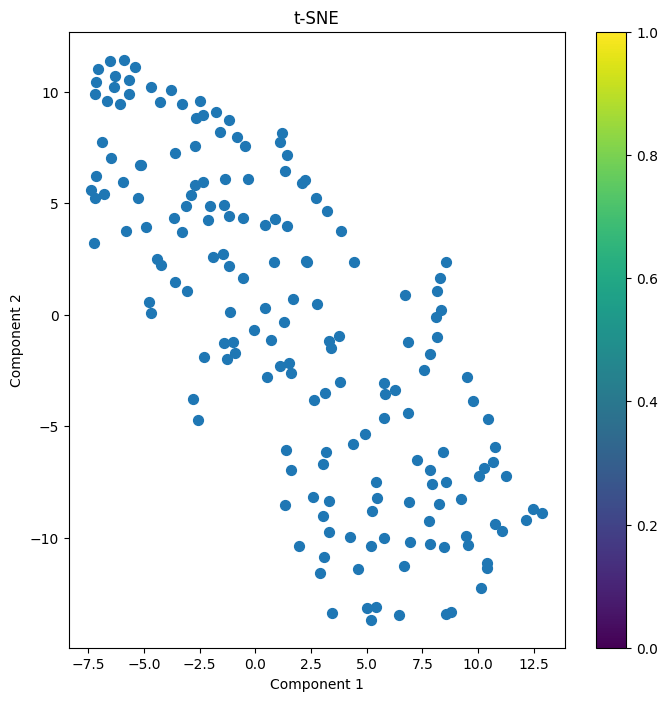

In [131]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(padded_tensor)

# # Визуализация данных с помощью TruncatedSVD
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_tags[:10000])
# plt.title('TruncatedSVD')
# plt.show()

# # Визуализация данных с помощью t-SNE
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tags[:10000])
# plt.title('t-SNE')
# plt.show()

# Визуализация данных с помощью TruncatedSVD
# plt.figure(figsize=(8, 6))
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_tags[:10000], cmap='viridis', s=50)
# plt.colorbar()
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('TruncatedSVD')
# plt.show()

# Визуализация данных с помощью t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=50)
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE')
plt.show()

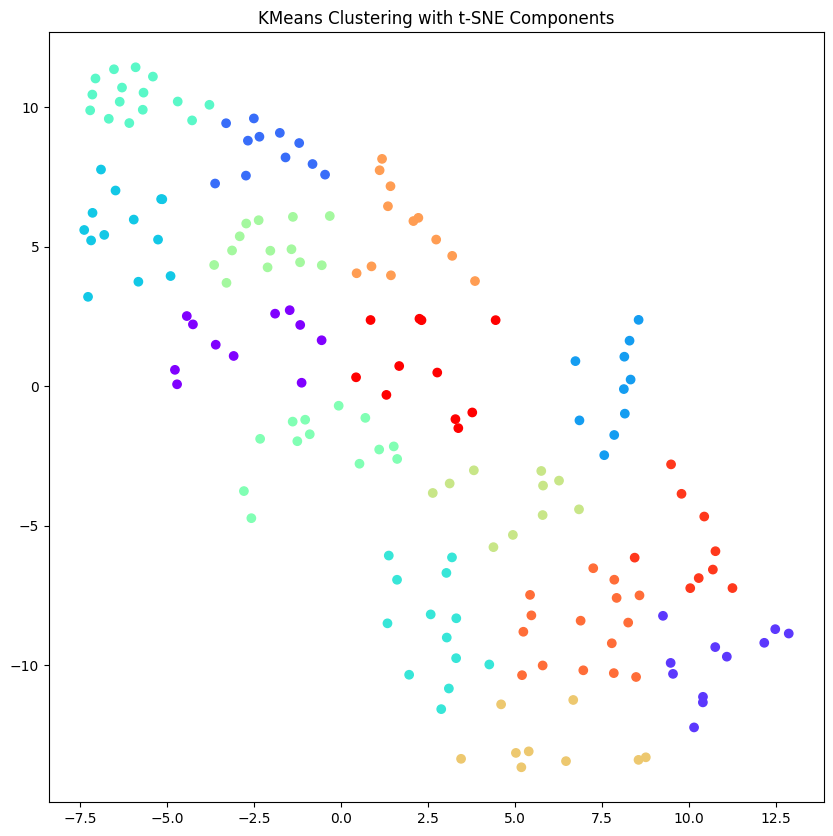

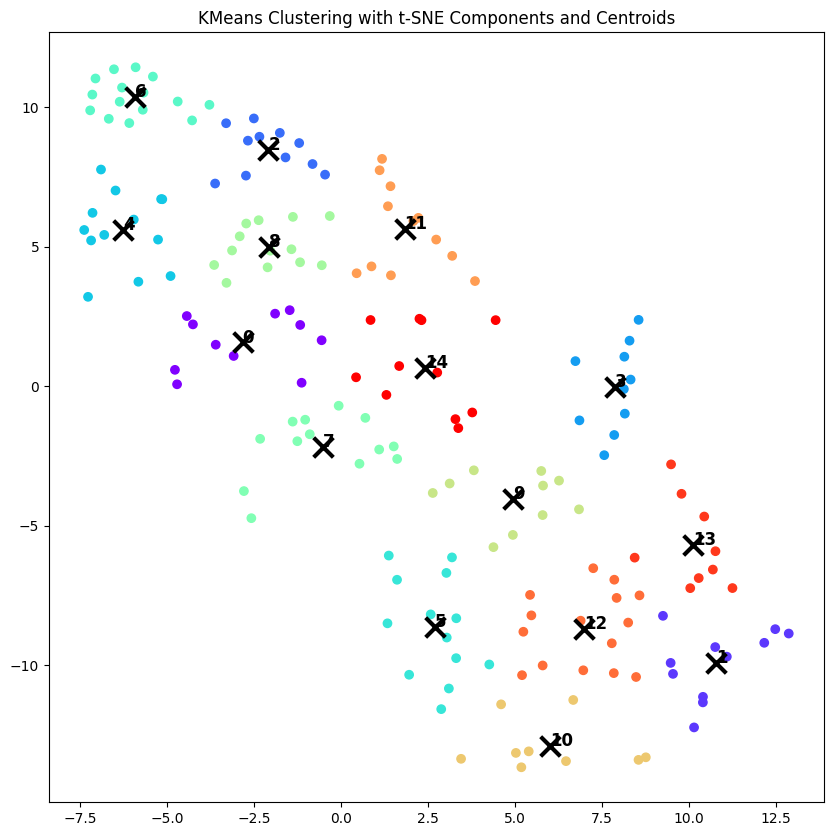

Silhouette score для компонент t-SNE: 0.40463015
Davies-Bouldin index для компонент t-SNE: 0.735839486065072


In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Кластеризация данных с помощью KMeans на основе компонент t-SNE
kmeans_tsne = KMeans(n_clusters=15, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)

# Визуализация кластеризации
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='rainbow')
plt.title('KMeans Clustering with t-SNE Components')
plt.show()

# Визуализация центроидов кластеров
plt.figure(figsize=(10, 10))
centroids_tsne = kmeans_tsne.cluster_centers_
centroid_labels_tsne = np.unique(labels_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='rainbow')
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], marker='x', s=200, linewidths=3, color='black')
for i, label in enumerate(centroid_labels_tsne):
    plt.annotate(label, (centroids_tsne[i, 0], centroids_tsne[i, 1]), fontsize=12, fontweight='bold')
plt.title('KMeans Clustering with t-SNE Components and Centroids')
plt.show()

# Вычисление Silhouette score для компонент t-SNE
silhouette_avg_tsne = silhouette_score(X_tsne, labels_tsne)
print("Silhouette score для компонент t-SNE:", silhouette_avg_tsne)

# Вычисление Davies-Bouldin index для компонент t-SNE
db_index_tsne = davies_bouldin_score(X_tsne, labels_tsne)
print("Davies-Bouldin index для компонент t-SNE:", db_index_tsne)

In [150]:
corpus_preprocessed

['удобный_ADJ расположенное_ADJ отделение_NOUN раз_NOUN вежливый_ADJ обслуживание_NOUN вопрос_NOUN моеи_PROPN картои_PROPN внимательный_ADJ сотрудник_NOUN профессионал_NOUN',
 'хорошии_ADJ банк_NOUN сотрудник_NOUN благодарность_NOUN ратниковои_PROPN валерия_PROPN викторович_PROPN понятный_ADJ предложение_NOUN продукт_NOUN банк_NOUN отделение_NOUN',
 'огромный_ADJ очередь_NOUN талончик_NOUN очередь_NOUN специалист_NOUN проблема_NOUN последнии_NOUN раз_NOUN рука_NOUN причина_NOUN',
 'банк_NOUN сотрудник_NOUN больший_ADJ молодец_NOUN обслуживание_NOUN быстрый_ADJ высокий_ADJ уровень_NOUN',
 'консультант_NOUN зал_NOUN оператор_NOUN стоикои_NOUN приятный_ADJ девушка_NOUN представитель_NOUN банк_NOUN представление_NOUN услуга_NOUN банк_NOUN вклад_NOUN сеифа_NOUN банк_NOUN вопрос_NOUN понятный_ADJ человек_NOUN информациеи_NOUN уважаемый_ADJ администрация_NOUN сотрудник_NOUN продукция_NOUN банк_NOUN сотрудник_NOUN банк_NOUN клиент_NOUN сотрудник_NOUN лишний_ADJ вопрос_NOUN',
 'персонал_NOUN вн

In [157]:
from sklearn.decomposition import LatentDirichletAllocation

# Определите доминирующие ключевые слова для каждого кластера
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(padded_tensor)
len(lda.components_[1])

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_count = CountVectorizer()
X_count_vec = vectorizer_count.fit_transform([i for i in vocab.idx_to_token.values()])

In [156]:
vocab.idx_to_token.values()

dict_values(['<pad>', '<unk>', 'чистота_NOUN', 'красавица_NOUN', 'обременение_NOUN', 'сожаление_NOUN', 'офис_NOUN', 'новый_ADJ', 'квартплата_NOUN', 'друг_NOUN', 'приведение_NOUN', 'посещение_NOUN', 'работодатель_NOUN', 'запредельный_ADJ', 'привилегия_NOUN', 'мошенник_NOUN', 'здоровый_ADJ', 'банкомат_NOUN', 'круглосуточный_ADJ', 'возрождение_NOUN', 'беспредел_NOUN', 'получение_NOUN', 'рубль_NOUN', 'удобный_ADJ', 'телефон_NOUN', 'уважаемый_ADJ', 'связь_NOUN', 'готовность_NOUN', 'понятный_ADJ', 'система_NOUN', 'бабушка_NOUN', 'операция_NOUN', 'проблема_NOUN', 'коп_NOUN', 'изумительный_ADJ', 'знакомство_NOUN', 'квартира_NOUN', 'кредитный_ADJ', 'фонд_NOUN', 'оформление_NOUN', 'гриценко_PROPN', 'профессионал_NOUN', 'трудный_ADJ', 'номер_NOUN', 'разный_ADJ', 'особый_ADJ', 'приложение_NOUN', 'впечатление_NOUN', 'быстрый_ADJ', 'снятие_NOUN', 'правда_NOUN', 'девушка_NOUN', 'женщина_NOUN', 'талончик_NOUN', 'благодарность_NOUN', 'карточка_NOUN', 'кадр_NOUN', 'смена_NOUN', 'нормальный_ADJ', 'предуп

In [158]:
feature_names = vectorizer_count.get_feature_names()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-6:-1]
    # print(top_words_idx)
    # print(feature_names)
    top_words = [feature_names[i] for i in top_words_idx]
    # print(123)
    print(f"Cluster {i}: {', '.join(top_words)}")

Cluster 0: администратор_noun, pad, авто_noun, ад_noun, август_noun
Cluster 1: unk, pad, август_noun, авто_noun, ад_noun
Cluster 2: unk, адрес_noun, альтернатива_noun, администрация_noun, август_noun
Cluster 3: александр_propn, адрес_noun, август_noun, аппарат_noun, pad
Cluster 4: unk, аппарат_noun, администратор_noun, альтернатива_noun, адрес_noun
Cluster 5: pad, ад_noun, авто_noun, адрес_noun, альтернатива_noun
Cluster 6: авто_noun, администрация_noun, август_noun, ад_noun, администратор_noun
Cluster 7: ад_noun, август_noun, адрес_noun, pad, администрация_noun
Cluster 8: александр_propn, авто_noun, unk, администрация_noun, администратор_noun
Cluster 9: адрес_noun, альтернатива_noun, администратор_noun, pad, unk
Cluster 10: авто_noun, август_noun, ад_noun, unk, pad
Cluster 11: александр_propn, ад_noun, адрес_noun, альтернатива_noun, авто_noun
Cluster 12: август_noun, pad, unk, авто_noun, администратор_noun
Cluster 13: альтернатива_noun, ад_noun, август_noun, авто_noun, администрация_n

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
